# **Rainfall Prediction in Penang** <img src="https://drive.google.com/uc?id=1Q_F62T9tKiYtYca0HFQFwK2QZiXZCQD5" width="80px" height="auto">




##**1. Introduction**

**Rainfall** is one of the sole responsible factors for most of the significant things across the world. Malaysia, an Asian state located just north of the equator, the climate is hot, humid, and rainy throughout the year. The rainfall in Malaysia is abundant and frequent throughout the year, where in most of the cases, the rains are caused by the **monsoon regime**. Unfortunately, the rains, as is generally the case in tropical countries, are quite erratic from year to year. This can be shown by the recent heavy rainfall affecting Malaysia which caused floods and landslides since mid-December 2021.

According to media reports, up to 50 people have died (of which 25 in Selangor, 21 in Pahang and 4 in Kelantan) and 2 people are missing. As of 3rd of January, the Malaysia National Disaster Management Agency (NADMA) confirms that the States of Kelantan, Terengganu, Selangor, Pahang, Johor, Malacca, Negeri Sembilan and Sabah are still affected by floods, with 14,459 individuals taking shelter at 191 evacuation centres. [Ref: https://reliefweb.int/disaster/fl-2021-000209-mys] 

This has motivated us to predict the rainfall in Penang based on several predictive models. We have chosen Penang to be the location for rainfall prediction as it is where our university, Universiti Sains Malaysia is situated.


### **Problem Statement**
According to a news article from New Straits Times, the weather in tropics are hard to predict as the weather events are short-lived. Besides, the constraints faced by the Malaysian Meteorological Department, such as radar stations coverage, affects the accuracy of weather predictions. This shows that a weather predictive model can be introduced to enhance the accuracy of weather predictions despite the constraints faced. Therefore, we hope to close this gap by carry out a project to study the best predictive model for rainfall prediction in Penang with the use of machine learning algorithms.

[Ref: https://www.nst.com.my/news/nation/2019/08/513461/weather-tropics-hard-predict]

### **Overall Project Idea**

We have decided to train and build a predictive model to predict the rainfall intensity in Penang. 

The features used to train the model includes date (year, month, day); the maximum, minimum and average values of: temperature, dew point, humidity and wind speed.

Overall, this notebook consist of these sections:
1. Introduction
<img src="https://drive.google.com/uc?id=1yepM43M6ZbhKj7ZLcLT9ytopnZw1YQJH" width="600px" height="auto">

2. Dataset
<img src="https://drive.google.com/uc?id=1PwpNHfuivl-NBVgDOXpwP8KQZo7ebHsq" width="600px" height="auto">

3. Data Preprocessing and Preparation
<img src="https://drive.google.com/uc?id=1S_DqTOuozRAnq6t4x03wF1YClrRRqLEw" width="600px" height="auto">

4. Proposed Solution
<img src="https://drive.google.com/uc?id=1QL5uGfvBuLlMn5cqubGiAjitvkqBrDbs" width="600px" height="auto">

5. Conclusion
<img src="https://drive.google.com/uc?id=1bv3bNRLxaqDJUHMziRFExt07dFGSrcFA" width="600px" height="auto">

### **Field Involved**

Our project is in the field of **meteorology**. According to National Geographic, meteorology is the science dealing with the atmosphere and its phenomena, including both weather and climate. Besides weather forecasting, meteorology is concerned with long-term trends in climate and weather, and their potential impact on human populations.

[Ref: https://www.nationalgeographic.org/encyclopedia/meteorology/]




##**2. Dataset**

The dataset used in this project is gathered from 2 sources:
1. Malaysia Open Data Portal (https://www.data.gov.my/) ▶ Rainfall Index of Penang 
2. Weather Underground (https://www.wunderground.com/) ▶ Weather Conditions

To collect the data, a few steps are involved:
1. Download daily rainfall index data from Malaysia Open Data Portal.
2. Access the weather data in Penang from 2014 to 2020 for each months in Weather Underground website.
3. Copy the weather data records to an Excel spreadsheet.
4. Map the **weather data records** with the **rainfall index data** with VLOOKUP function in Excel, where the key for mapping is the date (Year, Month, Day).
5. Check the result of data mapping and copy the data records to another Excel spreadsheet. Saved it as .csv file format.

Scope of the dataset:
1. Around **55%** of history weather data is collected between **2014 to 2020**
2. The location of weather condition and rainfall index is **Penang**







###**Analysis and Details of The Dataset**

To import the libraries required:

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Let's view our dataset to understand the features provided.

We can load our csv file from GitHub repository into dataframe with Pandas `read_csv` function. 

To read the date column correctly, we use the argument ```parse_dates``` to specify the date column.

To let Pandas consider day first instead of month for the date, we set the argument ```dayfirst``` to True.

In [3]:
# To store dataset from csv file in GitHub to dataframe
url = 'https://raw.githubusercontent.com/Night9Yj/WMU102-Makers/main/penang-rainfall-dataset.csv?token=GHSAT0AAAAAABP7XG5F63XPL3BC3RMAP7ASYPNOEYQ'
# Parse date column and set true for showing day first
df = pd.read_csv(url, parse_dates=["date"], dayfirst=True)

Next, we added a column for rainfall category.
The category of the rainfall intensity are assigned according to the rainfall values, where we separated them into None, Light, Moderate, Heavy and Above categories. The categories with their respective range of rainfall values can be found in later section.

In [4]:
df['rainfall_category'] = pd.cut(df['rainfall'], bins=[-np.inf,0,20,50,np.inf], labels=['None','Light','Moderate','Heavy and Above'])

We also added columns for year, month and day, where the values are extracted from the date column.

In [5]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [6]:
# To show the dataframe
df

,date,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,rainfall_category,year,month,day
0,2014-01-01,90,83.7,79,75,72.3,70,79,69.1,55,13,6.5,0,9.07,Light,2014,1,1
1,2014-01-03,90,81.9,79,79,74.0,72,94,77.8,62,10,6.3,0,5.66,Light,2014,1,3
2,2014-01-05,88,82.4,77,77,73.0,72,89,74.3,58,10,4.8,0,3.26,Light,2014,1,5
3,2014-01-10,84,78.3,77,77,75.6,75,100,92.0,79,10,4.0,0,0.98,Light,2014,1,10
4,2014-01-11,84,79.3,77,77,73.7,72,100,83.9,70,14,6.9,0,0.02,Light,2014,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2020-12-24,90,82.9,77,77,73.7,72,84,74.5,59,9,5.2,0,0.00,None,2020,12,24
1412,2020-12-26,88,80.2,77,77,75.5,73,94,86.9,70,20,5.6,0,1.38,Light,2020,12,26
1413,2020-12-27,90,82.0,75,77,73.9,72,94,78.4,55,12,5.4,0,0.18,Light,2020,12,27
1414,2020-12-28,90,82.4,77,77,75.7,73,100,81.3,62,10,3.4,0,0.71,Light,2020,12,28


From the above preview, we can see that there are 1416 rows and 18 columns of data.

**Descriptions of Data Columns**

<table>
  <tr>
    <th><h5><b>Features</b></h5></th>
    <th><h5><b>Descriptions</b></h5></th>
  </tr>
  <tr>
    <td><h6><b>Date (YYYY/MM/DD)</b></h6></td>
    <td><h6>Date of the data recorded</h6></td>
  </tr>
  <tr>
    <td><h6><b>Temperature (F)</b></h6></td>
    <td><h6>Temperature of the surrounding in Farenheit</h6></td>
  </tr>
  <tr>
    <td><h6><b>Dew Point (F)</b></h6></td>
    <td><h6>Temperature at which air is saturated with water vapor in Farenheit</h6></td>
  </tr>
  <tr>
    <td><h6><b>Humidity (%)</b></h6></td>
    <td><h6>The amount of water in the air</h6></td>
  </tr>
  <tr>
    <td><h6><b>Wind Speed (mph)</b></h6></td>
    <td><h6>Describes how fast the air is moving past a certain point in miles per hour</h6></td>
  </tr>
  <tr>
    <td><h6><b>Rainfall (mm)</b></h6></td>
    <td><h6>The amount of precipitation measured by the depth in millimeters</h6></td>
  </tr>
  <tr>
    <td><h6><b>Rainfall Categories</b></h6></td>
    <td><h6>The category of rainfall intensity which is assigned based on the amount of rainfall</h6></td>
  </tr>
</table>
<figcaption align='center'>Table 1 - Descriptions of Data Columns</figcaption>


**Explanation of Rainfall Values**

According to the Department of Irrigation and Drainage of Malaysia, continuous rain of more than 60mm for 2 to 4 hours may cause flash floods. 
[Ref: https://publicinfobanjir.water.gov.my/hujan/data-hujan/?lang=en]

As our data source is collecting rainfall values daily, Table 2 shows the categories of daily rainfall intensity.

We have separated our rainfall values in this dataset to only 4 categories, including: None, Light, Moderate and Heavy and Above as we are lack of data in the categories: Very Heavy and Extreme.

<table>
  <tr>
    <th><h5><b>Category</b></h5></th>
    <th><h5><b>Rainfall (mm)</b></h5></th>
    <th><h5><b>Intensity</b></h5></th>
  </tr>
  <tr>
    <td><h6><b>None</b></h6></td>
    <td><h6> 0 </h6></td>
    <td></td>
  </tr>
  <tr>
    <td><h6><b>Light</b></h6></td>
    <td><h6> 0 < R <= 20 </h6></td>
    <td><img src="https://drive.google.com/uc?id=1mWWMSmPQh-wJduBkYAw9Qx3etVZJT4fC" width="60px" height="auto"></td>
  </tr>
  <tr>
    <td><h6><b>Moderate</b></h6></td>
    <td><h6>20 < R <= 50</h6></td>
    <td><img src="https://drive.google.com/uc?id=1fo8tgv0TbX7pwPSrwK6YzIFVchy7gbbv" width="60px" height="auto"></td>
  </tr>
  <tr>
    <td><h6><b>Heavy</b></h6></td>
    <td><h6>50 < R <= 100</h6></td>
    <td><img src="https://drive.google.com/uc?id=12qeKHOLkC3nh4CuT7sjpRaIsq4BxffPj" width="60px" height="auto"></td>
  </tr>
  <tr>
    <td><h6><b>Very Heavy</b></h6></td>
    <td><h6>100 < R <= 150</h6></td>
    <td><img src="https://drive.google.com/uc?id=1VNC-41RETFmvefuTvUrUhZt9d4YjErp_" width="60px" height="auto"></td>
  </tr>
  <tr>
    <td><h6><b>Extreme</b></h6></td>
    <td><h6>>150</h6></td>
    <td><img src="https://drive.google.com/uc?id=13Vzf4GTBuB44DIw-21BCw21Q4h7L8ysm" width="60px" height="auto"></td>
  </tr>
</table>
<figcaption align='center'>Table 2 - Categories of Daily Rainfall Intensity</figcaption>
[Ref: https://www.researchgate.net/publication/349298336_Analysis_of_Intensity_Duration_and_Frequency_Rain_Daily_of_Java_Island_Using_Mononobe_Method]

To view basic statistical details, let's run Pandas ``describe`` function.

Let's view the statistics of the numerical columns we have.

In [7]:
df.describe(include='number')

,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,year,month,day
count,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,89.421610,82.942161,77.662429,78.449153,75.668856,72.786017,93.483757,79.741243,62.667373,11.658898,4.462288,0.166667,6.280473,2017.271893,6.519774,16.074153
std,2.430562,1.903345,2.998308,2.060625,2.307238,3.416460,5.654207,6.419803,8.422934,2.925729,1.355472,0.642800,16.107051,2.039248,3.412868,8.851871
min,77.000000,75.800000,0.000000,66.000000,64.300000,0.000000,66.000000,53.100000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,88.000000,81.700000,77.000000,77.000000,74.700000,72.000000,89.000000,76.500000,58.000000,10.000000,3.500000,0.000000,0.050000,2015.000000,4.000000,8.000000
50%,90.000000,83.100000,77.000000,79.000000,76.000000,73.000000,94.000000,80.800000,62.000000,12.000000,4.300000,0.000000,1.015000,2017.000000,7.000000,16.000000
75%,91.000000,84.300000,79.000000,79.000000,77.100000,75.000000,100.000000,83.800000,70.000000,13.000000,5.200000,0.000000,5.630000,2019.000000,9.000000,24.000000
max,97.000000,87.900000,86.000000,84.000000,81.000000,81.000000,100.000000,100.000000,100.000000,58.000000,12.500000,7.000000,255.920000,2020.000000,12.000000,31.000000


**Count**

From the above statistics, we can see that all features have a count of **1416**, which is the total number of data records. 

**Analysing Data Dispersion - Standard Deviation**

The standard deviations of max temperature, average temperature, min temperature, max dew point, average dew point, min dew point, max wind speed and average wind speed are having values from **1.355 to 3.416**, which shows that the data points are nearer to the mean; compared to max humidity, average humidity and min humidity that have standard deviations ranging from **5.654 to 8.423**, which shows that the data have greater dispersion. 

The min wind speed shows the smallest standard deviation of **0.643**, as the it is having the values in a small range, which is from a minimum of 0 to a maximum of 7.

The standard deviation of rainfall is high, with a value of **16.107**. From the statistical data, the mean of the rainfall **6.280** is smaller than its standard deviation. We can infer that there are high number of data values that is higher than the mean, showing the data is widely dispersed.

**Temperature**

According to MyGovernment website, the average daily temperature across Malaysia is between 21°C (69.8 F) and 32°C (89.6 F). The mean of max temperature, average temperature and min temperature falls under this range as well. 50% of data has maximum temperature more than 89.6F, which is higher than the average daily temperature stated. 
[Ref: https://www.malaysia.gov.my/portal/content/144] 

**Dew Point**

According to an article from Life Science, the general comfort level of dew point is 60 F or lower. The mean of average dew point in Penang is 75.669, which shows that there is more moisture in the air than the average comfort level. With this level of dew point, most people will feel hot or "sticky" as the amount of water vapor in the air slows down the evaporation of perspiration, which keeps the body from cooling. The high dew point may be due to Malaysia is having tropical weather all year round.
[Ref: https://www.livescience.com/43269-what-is-dew-point.html]

**Humidity**

Penang also has a high humidity level, where the mean value of average humidity is higher than **70%**. Similar to dew point, human will perspire slower when the humidity level is higher.

**Wind Speed**

**75%** of the data recorded a maximum wind speed of 13 and an average wind speed of 5.2. According to National Weather Service website, 13 is categorized as moderate breeze, while 5.2 is categorized as light breeze. We can infer that usually the wind speed in Penang is in a safe range, without causing any damage to the people and surroundings.
[Ref: https://www.weather.gov/pqr/wind]

**Rainfall**

**50% to 75%** of rainfall values are less than **5.630**, which falls under the category of **light rainfall intensity**. Thus, we may conclude that most of the data values show that Penang is not likely to have a flood. However, the maximum rainfall value of **255.920** falls under the category of **extreme rainfall intensity**, which shows the existence of outliers that indicates the possibility of floods to happen in Penang.

Let's view the statistics of the category column we have.

In [8]:
df.describe(include='category')

,rainfall_category
count,1416
unique,4
top,Light
freq,1118


From the above statistics, we can see that there are 1416 data records that consist of **4** different categories in rainfall category. Besides, the category **Light** has the highest frequency of **1118**.

###**Data Type of Each Columns**

To check the data type of each columns, we use Pandas ```dtypes``` function.

In [9]:
print(df.dtypes)

date                 datetime64[ns]
max_temperature               int64
avg_temperature             float64
min_temperature               int64
max_dew_point                 int64
avg_dew_point               float64
min_dew_point                 int64
max_humidity                  int64
avg_humidity                float64
min_humidity                  int64
max_wind_speed                int64
avg_wind_speed              float64
min_wind_speed                int64
rainfall                    float64
rainfall_category          category
year                          int64
month                         int64
day                           int64
dtype: object



<table>
  <tr>
    <th><h5><b>Columns</b></h5></th>
    <th><h5><b>Data Type</b></h5></th>
  </tr>
  <tr>
    <td><h6><b>Date</b></h6></td>
    <td><h6>Datetime</h6></td>
  </tr>
  <tr>
    <td><h6><b>Max Temperature</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
  <tr>
    <td><h6><b>Min Temperature</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
  <tr>
    <td><h6><b>Average Temperature</b></h6></td>
    <td><h6>Float</h6></td>
  </tr>
  <tr>
    <td><h6><b>Max Dew Point</b></h6></td>
    <td><h6>Integer</td>
  </tr>
  <tr>
    <td><h6><b>Min Dew Point</b></h6></td>
    <td><h6>Integer</td>
  </tr>
  <tr>
    <td><h6><b>Average Dew Point</b></h6></td>
    <td><h6>Float</td>
  </tr>
  <tr>
    <td><h6><b>Max Humidity</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
  <tr>
    <td><h6><b>Min Humidity</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
  <tr>
    <td><h6><b>Average Humidity</b></h6></td>
    <td><h6>Float</h6></td>
  </tr>
  <tr>
    <td><h6><b>Max Wind Speed (mph)</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
  <tr>
    <td><h6><b>Min Wind Speed (mph)</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
  <tr>
    <td><h6><b>Average Wind Speed (mph)</b></h6></td>
    <td><h6>Float</h6></td>
  </tr>
  <tr>
    <td><h6><b>Rainfall (mm)</b></h6></td>
    <td><h6>Float</h6></td>
  </tr>
  <tr>
    <td><h6><b>Rainfall Category</b></h6></td>
    <td><h6>Category</h6></td>
  </tr>
  <tr>
    <td><h6><b>Year</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
  <tr>
    <td><h6><b>Month</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
  <tr>
    <td><h6><b>Day</b></h6></td>
    <td><h6>Integer</h6></td>
  </tr>
</table>
<figcaption align='center'>Table 3 - Data Type of Each Columns</figcaption>

Table 3 shows the data type of each columns. The features consist of datetime, integer, float and category data types. The features: date, average temperature, average dew point, average humidity, average wind speed, and rainfall are continuous data, while the rest of the data are discrete.

##**3. Data Preprocessing and Preparation** 

### **Analyse Data Values**


To check the number of rows and columns of the data frame, we use Pandas ```shape``` function. 

In [10]:
df.shape

(1416, 18)

To list out all the columns in this data set, we use the ```print``` function to print out the columns.

In [11]:
print(df.columns)

Index(['date', 'max_temperature', 'avg_temperature', 'min_temperature',
       'max_dew_point', 'avg_dew_point', 'min_dew_point', 'max_humidity',
       'avg_humidity', 'min_humidity', 'max_wind_speed', 'avg_wind_speed',
       'min_wind_speed', 'rainfall', 'rainfall_category', 'year', 'month',
       'day'],
      dtype='object')


Next, we check how many null values exist in this dataset.

In [12]:
# To show the number of NA elements in every column
df.isnull().sum()

date                 0
max_temperature      0
avg_temperature      0
min_temperature      0
max_dew_point        0
avg_dew_point        0
min_dew_point        0
max_humidity         0
avg_humidity         0
min_humidity         0
max_wind_speed       0
avg_wind_speed       0
min_wind_speed       0
rainfall             0
rainfall_category    0
year                 0
month                0
day                  0
dtype: int64

The above result shows that there is no null values in this dataset.

After a quick scan on the dataset, we noticed that there are some columns that have data values of 0.

Therefore, we need to check what are the columns that have data values of 0, to ensure that the values are reasonable.

We will drop the date and rainfall (result) columns as they are unnecessary to check for zero values. 

Pandas ```drop``` function is used, where axis=1 represents that the drop action will act on columns.

In [13]:
dataCheck = df.drop(['date','rainfall'],axis=1)
dataCheck

,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall_category,year,month,day
0,90,83.7,79,75,72.3,70,79,69.1,55,13,6.5,0,Light,2014,1,1
1,90,81.9,79,79,74.0,72,94,77.8,62,10,6.3,0,Light,2014,1,3
2,88,82.4,77,77,73.0,72,89,74.3,58,10,4.8,0,Light,2014,1,5
3,84,78.3,77,77,75.6,75,100,92.0,79,10,4.0,0,Light,2014,1,10
4,84,79.3,77,77,73.7,72,100,83.9,70,14,6.9,0,Light,2014,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,90,82.9,77,77,73.7,72,84,74.5,59,9,5.2,0,None,2020,12,24
1412,88,80.2,77,77,75.5,73,94,86.9,70,20,5.6,0,Light,2020,12,26
1413,90,82.0,75,77,73.9,72,94,78.4,55,12,5.4,0,Light,2020,12,27
1414,90,82.4,77,77,75.7,73,100,81.3,62,10,3.4,0,Light,2020,12,28


Let's print out the number of zero in each columns.

In [14]:
print("Columns              No. of 0s")
(dataCheck == 0).astype(int).sum(axis=0)

Columns              No. of 0s


max_temperature         0
avg_temperature         0
min_temperature         1
max_dew_point           0
avg_dew_point           0
min_dew_point           1
max_humidity            0
avg_humidity            0
min_humidity            1
max_wind_speed          1
avg_wind_speed          1
min_wind_speed       1274
rainfall_category       0
year                    0
month                   0
day                     0
dtype: int64

The columns: min temperature, min dew point, min humidity, max wind speed and average wind speed have 1 zero value.

A maximum wind speed and average wind speed of 0 throughout the day is not possible, therefore the values are invalid.

Besides that, a min humidity of 0 is also not possible. According to an article, water vapor is always present in the air, so humidity is not possible to be 0.
[Ref: https://wgntv.com/weather/can-the-relative-humidity-ever-be-zero-percent/]

In addition, min temperature and min dew point of 0 are not possible in Penang. This scenario might be due to device error in the weather station. 

Therefore, for the values stated above, we shall substitute them with suitable values.

------------

There are **1274** zero values in **min wind speed** column.
However, it is possible that throughout the day, there is a point of time where the minimum wind speed is 0.
Therefore, no data cleaning is required for this column.

###**Data Cleaning**

Firstly, let's find out which row of data has a **max wind speed** of 0.

We use Pandas ```loc``` function, where we can access a group of rows and columns by label(s).

In [15]:
df.loc[df['max_wind_speed'] == 0]

,date,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,rainfall_category,year,month,day
1296,2020-11-18,77,77.0,77,77,77.0,77,100,100.0,100,0,0.0,0,12.28,Light,2020,11,18


It is found that this row of data with date **2020-11-18** has a max wind speed and average wind speed of 0. To subsitute a value for it, we will search for the most recent data record that has the same month and day as the date above.

In [16]:
df.loc[df['date'].isin(['2019-11-18','2018-11-18','2017-11-18','2016-11-18','2015-11-18','2014-11-18'])]

,date,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,rainfall_category,year,month,day
1202,2014-11-18,88,82.4,79,79,75.4,73,89,80.0,70,8,4.5,0,4.80,Light,2014,11,18
1217,2015-11-18,88,80.4,73,77,73.8,72,100,81.6,62,12,3.9,0,0.03,Light,2015,11,18
1234,2016-11-18,90,81.8,77,79,76.1,73,100,83.8,62,13,5.4,0,0.00,None,2016,11,18
1262,2018-11-18,90,85.2,81,79,77.5,73,94,78.3,59,9,3.3,0,0.05,Light,2018,11,18


It is found that the data record with the date **2018-11-18** is the nearest data record with the same month and day as the record **2020-11-18**.

Therefore, we will substitute the values of **9** as max wind speed and **3.3** as average wind speed for the data record with date 18/11/2018.

In [17]:
df.max_wind_speed = np.where((df.date=='2020-11-18'), 9, df.max_wind_speed)
df.avg_wind_speed = np.where((df.date=='2020-11-18'), 3.3, df.avg_wind_speed)

Let's check whether the data is substituted correctly.

In [18]:
df.loc[df['date']=='2020-11-18']

,date,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,rainfall_category,year,month,day
1296,2020-11-18,77,77.0,77,77,77.0,77,100,100.0,100,9,3.3,0,12.28,Light,2020,11,18


For the data with 0 values to be substituted, so far we had left with:
* min_temperature
* min_dew_point
* min_humidity
* ~~max_wind_speed~~
* ~~avg_wind_speed~~

Next, we will check the data with **min_temperature** of 0.

In [19]:
df.loc[df['min_temperature'] == 0]

,date,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,rainfall_category,year,month,day
347,2016-05-23,90,81.1,0,75,72.3,0,94,74.5,0,10,3.2,0,0.0,None,2016,5,23


We found out that the data record with date of **23/5/2016** have 0 values for min temperature, min dew point and min humidity. Therefore, we will try to locate one of the nearest year with the same month and day for these values.

In [20]:
df.loc[df['date'].isin(['2020-05-23','2019-05-23','2018-05-23','2017-05-23','2015-05-23','2014-05-23'])]

,date,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,rainfall_category,year,month,day
208,2015-05-23,90,81.8,77,79,76.1,73,94,83.3,66,16,4.0,0,0.00,None,2015,5,23
618,2018-05-23,90,84.0,79,81,77.9,75,94,82.8,66,12,5.0,0,0.08,Light,2018,5,23
973,2020-05-23,88,82.1,79,81,77.7,75,94,86.8,74,13,3.6,0,0.11,Light,2020,5,23


It is found that the data record with the date **2015-05-23** is the nearest data record with the same month and day as the record **2016-05-23**.

Therefore, we will substitute the values **77** as min temperature, **73** as min dew point and **66** as min humidity.

In [21]:
df.min_temperature = np.where((df.date=='2016-05-23'), 77, df.min_temperature)
df.min_dew_point = np.where((df.date=='2016-05-23'), 73, df.min_dew_point)
df.min_humidity = np.where((df.date=='2016-05-23'), 66, df.min_humidity)

Let's check whether the data is substituted correctly.

In [22]:
df.loc[df['date']=='2016-05-23']

,date,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,rainfall_category,year,month,day
347,2016-05-23,90,81.1,77,75,72.3,73,94,74.5,66,10,3.2,0,0.0,None,2016,5,23


To confirm all values with 0 that need to be substituted are done, let us run again the codes to check for 0 values of the columns.

In [23]:
dataCheckAgain = df.drop(['date',	'rainfall'],axis=1)

print("Columns              No. of 0s")
(dataCheckAgain == 0).astype(int).sum(axis=0)

Columns              No. of 0s


max_temperature         0
avg_temperature         0
min_temperature         0
max_dew_point           0
avg_dew_point           0
min_dew_point           0
max_humidity            0
avg_humidity            0
min_humidity            0
max_wind_speed          0
avg_wind_speed          0
min_wind_speed       1274
rainfall_category       0
year                    0
month                   0
day                     0
dtype: int64

As values of 0 for min wind speed is acceptable, our data is now clean and ready for training.

### **Data Visualisation**

####**Cloning Dataframe for Modifications**

To better visualized our data by resampling them in week, month or year categories, we need to use the date we have as DatetimeIndex data type. 

Therefore, to prevent us from altering the current data, we will copy the dataframe (df) into another variable: dataframe2 (df2). 

If we use our current date column as DatetimeIndex, it will not be shown as a column anymore. Thus, we will create a new column called dateIndex and copy the date values to it. Then, we will replace our index number with values in this column. 

To deep copy the dataframe into another:

In [24]:
df2 = df.copy()

To remain the date column with datetime datatype and replace the index number with DatetimeIndex values that ease resampling:

In [25]:
df2['dateIndex'] = pd.to_datetime(df2.date)
df2.set_index('dateIndex', inplace=True)
df2

,date,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,rainfall,rainfall_category,year,month,day
dateIndex,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,90,83.7,79,75,72.3,70,79,69.1,55,13,6.5,0,9.07,Light,2014,1,1
2014-01-03,2014-01-03,90,81.9,79,79,74.0,72,94,77.8,62,10,6.3,0,5.66,Light,2014,1,3
2014-01-05,2014-01-05,88,82.4,77,77,73.0,72,89,74.3,58,10,4.8,0,3.26,Light,2014,1,5
2014-01-10,2014-01-10,84,78.3,77,77,75.6,75,100,92.0,79,10,4.0,0,0.98,Light,2014,1,10
2014-01-11,2014-01-11,84,79.3,77,77,73.7,72,100,83.9,70,14,6.9,0,0.02,Light,2014,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,90,82.9,77,77,73.7,72,84,74.5,59,9,5.2,0,0.00,None,2020,12,24
2020-12-26,2020-12-26,88,80.2,77,77,75.5,73,94,86.9,70,20,5.6,0,1.38,Light,2020,12,26
2020-12-27,2020-12-27,90,82.0,75,77,73.9,72,94,78.4,55,12,5.4,0,0.18,Light,2020,12,27


From the above dataframe values, we can see that the columns and data are retained, after altering our index number to date values with DatetimeIndex data type.

####**Barcharts**

Barcharts help us to visualize the average and median rainfall in each months.

We are utilizing the library ```matplotlib``` to generate barplots.

<BarContainer object of 84 artists>

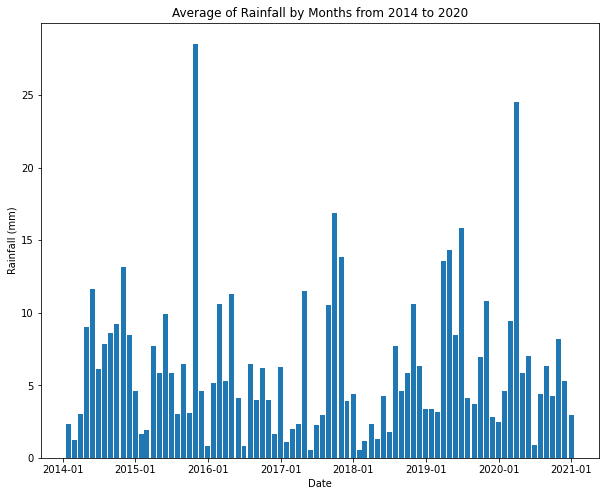

In [26]:
#for resampling the data into average in months
df2_month = df2.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Average of Rainfall by Months from 2014 to 2020')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(df2_month['2014':].index, df2_month.loc['2014':, "rainfall"], width=25, align='center')


In certain months, such as 2015-11 and 2020-03, we can see that the average rainfall is significantly higher than the other months.

We imply that from the dataset, Penang generally has rainfall less than 20 (light rain) on most of the days, while there are only some days that has values above 20. Therefore, from the average rainfall by months, we can deduce that the months with high ranfall values may have more rainy days or have certain days with high rainfall values (outliers).

As the dataset might contains several outliers for rainfall, we will generate the barcharts with median in months to view the data in another perspective.

<BarContainer object of 84 artists>

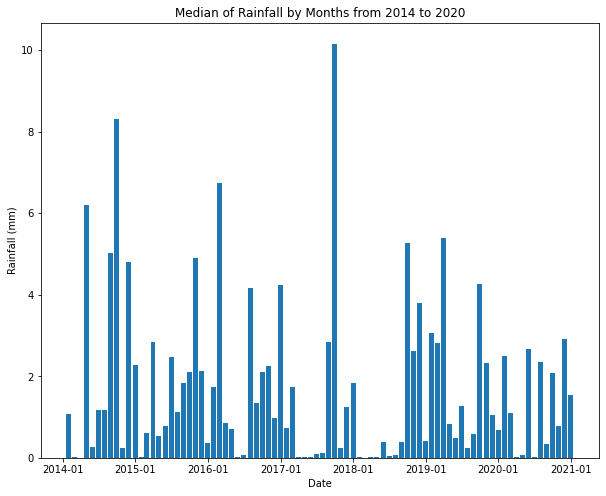

In [27]:
#for resampling the data into median in months
df2_month_median = df2.resample("M").median()
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Median of Rainfall by Months from 2014 to 2020')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(df2_month_median['2014':].index, df2_month_median.loc['2014':, "rainfall"], width=25, align='center')

From the median of rainfall by months, it clearly shows that the highest median value is around 10, which supports our implication that Penang generally has light rain on most of the days, while the months with high average of rainfall values might be contributed by data higher than the 50% range or outliers.

####**Line Charts**

To visualize the weekly and monthly average rainfall, we plot them in line charts. 

We have plotted 2 years of data in each graphs besides the last one with only data in 2020. This will allow us to view the graphs clearly and compare the spikes easily.

We are utilizing the library ```matplotlib``` to generate the line plots.

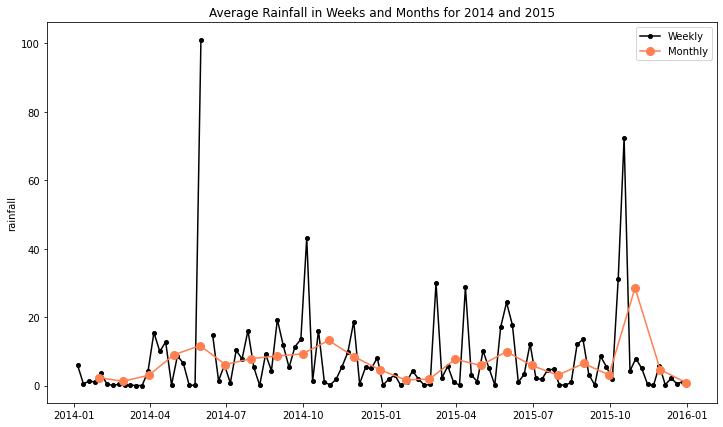

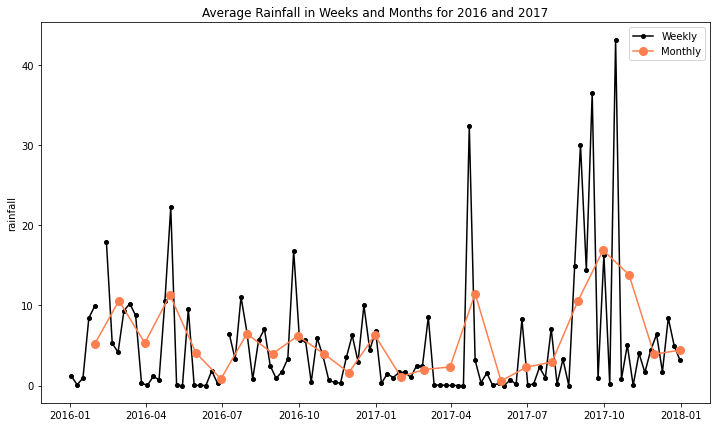

In [28]:
df2_week = df2.resample("W").mean()
start, end = '2014-01', '2015-12'
fig, ax = plt.subplots(figsize=(12, 7))
plt.title('Average Rainfall in Weeks and Months for 2014 and 2015')
ax.plot(df2_week.loc[start:end, 'rainfall'], marker='.', markersize=8, linestyle='-', label='Weekly', color='black')
ax.plot(df2_month.loc[start:end, 'rainfall'], marker='o', markersize=8, linestyle='-', label='Monthly', color='coral')
ax.set_ylabel("rainfall")
ax.legend()

start, end = '2016-01', '2017-12'
fig, ax = plt.subplots(figsize=(12, 7))
plt.title('Average Rainfall in Weeks and Months for 2016 and 2017')
ax.plot(df2_week.loc[start:end, 'rainfall'], marker='.', markersize=8, linestyle='-', label='Weekly', color='black')
ax.plot(df2_month.loc[start:end, 'rainfall'], marker='o', markersize=8, linestyle='-', label='Monthly', color='coral')
ax.set_ylabel("rainfall")
ax.legend()

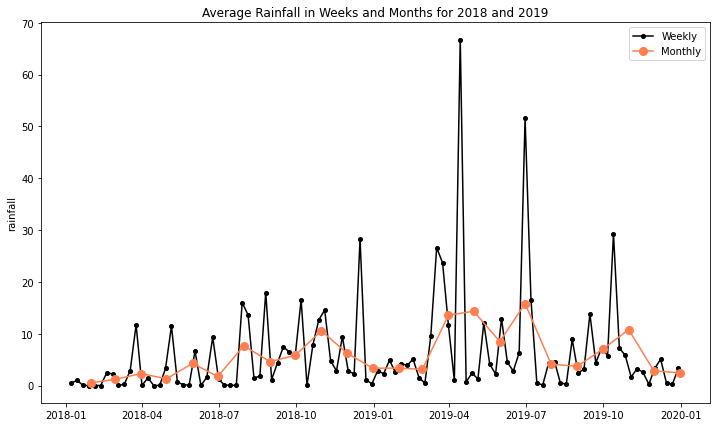

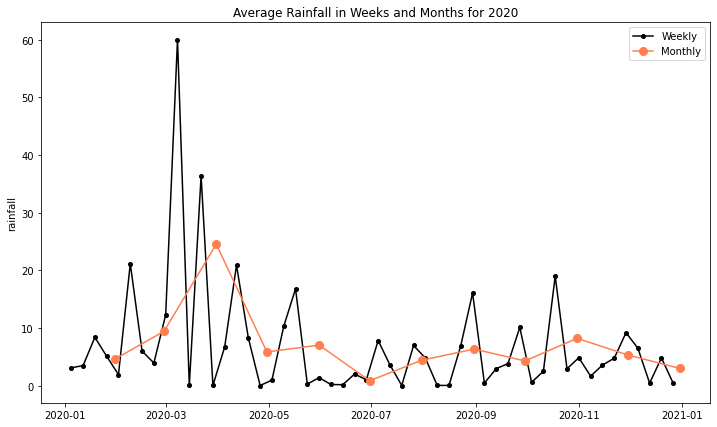

In [29]:
start, end = '2018-01', '2019-12'
fig, ax = plt.subplots(figsize=(12, 7))
plt.title('Average Rainfall in Weeks and Months for 2018 and 2019')
ax.plot(df2_week.loc[start:end, 'rainfall'], marker='.', markersize=8, linestyle='-', label='Weekly', color='black')
ax.plot(df2_month.loc[start:end, 'rainfall'], marker='o', markersize=8, linestyle='-', label='Monthly', color='coral')
ax.set_ylabel("rainfall")
ax.legend()

start, end = '2020-01', '2020-12'
fig, ax = plt.subplots(figsize=(12, 7))
plt.title('Average Rainfall in Weeks and Months for 2020')
ax.plot(df2_week.loc[start:end, 'rainfall'], marker='.', markersize=8, linestyle='-', label='Weekly', color='black')
ax.plot(df2_month.loc[start:end, 'rainfall'], marker='o', markersize=8, linestyle='-', label='Monthly', color='coral')
ax.set_ylabel("rainfall")
ax.legend()

We observed that there are more spikes for weekly average data compared to monthly average data. Most of the year has weekly spike(s) in between October and November, as well as between April and June for 2014, 2015, 2016, 2017 and 2019. However, the weekly spikes are in March to May for 2020. 

We imply that the rainfall data shows some similar trends on same months of different years. 

According to an article from Penang Global Tourism, Penang is rainy during the southwest monsoon from April to September. 

[Ref: https://www.mypenang.gov.my/about-penang/penang-weather/?lg=en] 

Besides, a website for hotel booking suggested that the wettest periods in Penang are from April to May and from October to November. 

[Ref: http://www.penang.ws/penang-info/climate.htm]

Our datasets show similar rainfall trends as from other sources, which supports that the data is reliable.

####**Boxplots**

Seaborn boxplots help us to visualize data distribution, where the box indicates the interquartile range between the first and third quartiles, the line in the box shows the median, and the whiskers show the range 25% above and below the interquartile range.

We have generated 12 box-and-whisker plots to show the distribution of different features in each months.

The ```boxplot``` library from seaborn is utilized for generating the boxplots.

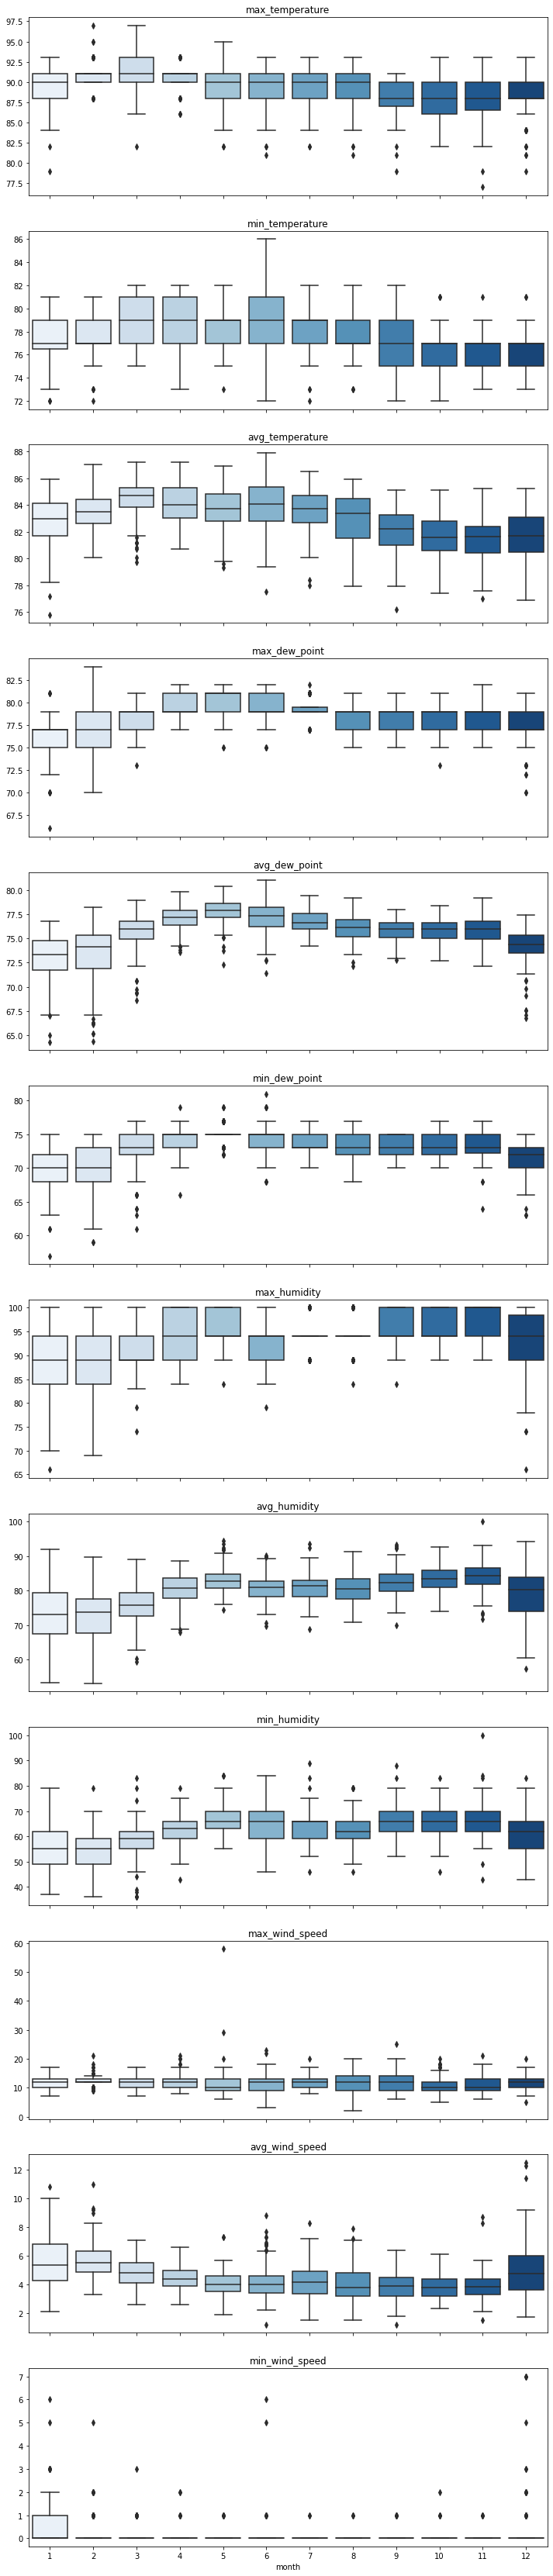

In [30]:
fig, axes = plt.subplots(12, 1, figsize=(12, 60), sharex=True)
for name, ax in zip(['max_temperature', 'min_temperature', 'avg_temperature', 'max_dew_point', 'avg_dew_point', 'min_dew_point', 'max_humidity',
       'avg_humidity', 'min_humidity', 'max_wind_speed', 'avg_wind_speed', 'min_wind_speed'], axes):
    sns.boxplot(data=df2, x="month", y=name, ax=ax, palette="Blues")
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

From the above boxplots, we observed that some of the boxes do not have a line that indicates the median. This is due to the median has the same value as the first interquartile. Besides, some of the data in a month might have large number of identical values, causing the boxes are not drawn completely with the line and whiskers. 

The median of max temperature and min temperature do not show obvious trends or differences between each months. However, we notice that the average temperature in March shows a higher value compared to the others in terms of the median and interquartile range.

The average dew point and average humidity is the highest in May for the median and interquartile range. The data for wind speed do not show any significant trend but we observed that there are quite a lot of outliers above the interquartile range for max, min and average wind speed.

From the boxplots, we can observe that there are several outliers in the dataset. However, we will not remove them from the dataset as they are in the acceptable range according to the weather in Malaysia.

####**Categorical Plots**

We use the library from ```catplot``` from seaborn to generate categorical plots. Besides, ```matplot``` library is used to generate the title of the graph.

Categorical plots are useful for us to visualize the relationship between two different variables.

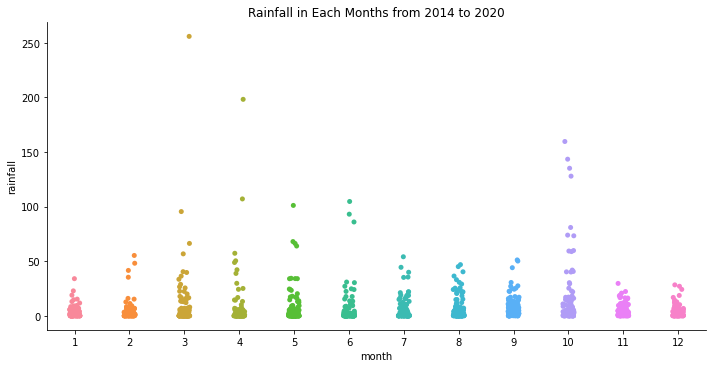

In [31]:
graph = sns.catplot(x="month", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall in Each Months from 2014 to 2020')
graph

From the figure above, we observed that the rainfall from March to June, and October have more rainfall values that are above 50.

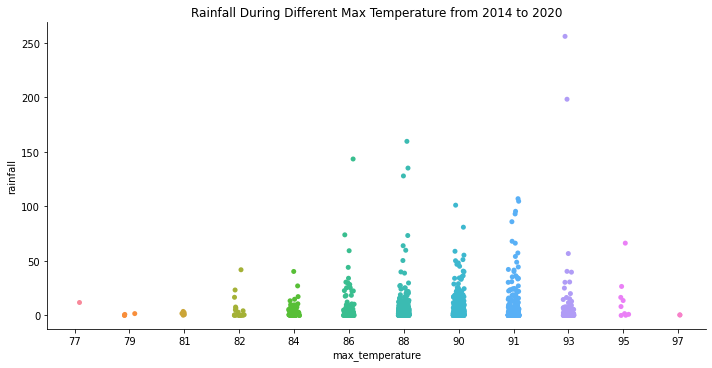

In [32]:
graph = sns.catplot(x="max_temperature", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall During Different Max Temperature from 2014 to 2020')
graph

There are several rainfall values that are higher than 150 when the data has a max temperature of 88 F or 93 F. There are more rainfall values above 20 when there is a max temperature of 90 F or 91 F.

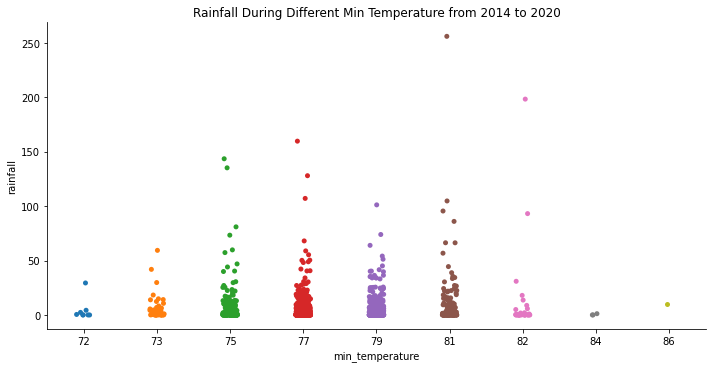

In [33]:
graph = sns.catplot(x="min_temperature", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall During Different Min Temperature from 2014 to 2020')
graph

The rainfall values are higher when the min temperature are 75 F or 77 F. There are 2 rainfall values that are above 75 when the min temperature is 82 F, while 1 rainfall value is above 250 when the min temperature is 81 F.

There is no significant trend that a higher min temperature will result in a higher rainfall values, but the 2 highest rainfall values that are above 150 are having min temperature of 81 F and 82 F respectively. 

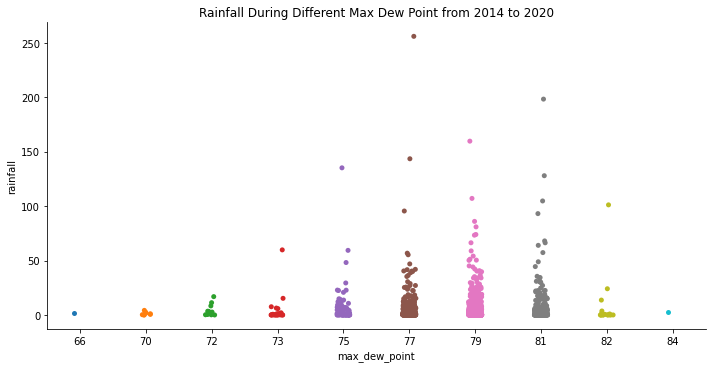

In [34]:
graph = sns.catplot(x="max_dew_point", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall During Different Max Dew Point from 2014 to 2020')
graph

A max dew point from 77 to 81 shows more rainfall values above 50. Therefore, we may conclude that there are higher possibility to have high rainfall when the max dew point is from 77 to 81.

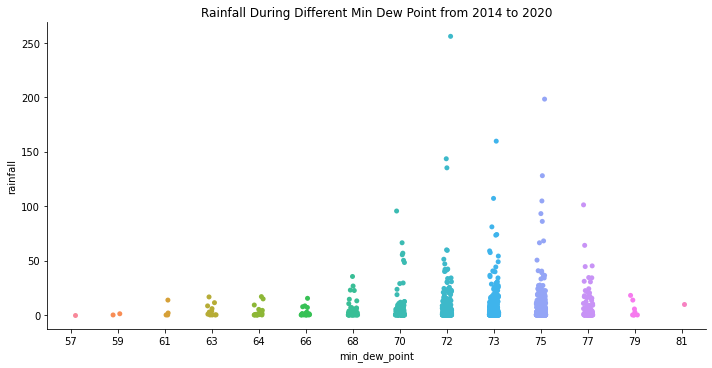

In [35]:
graph = sns.catplot(x="min_dew_point", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall During Different Min Dew Point from 2014 to 2020')
graph

The rainfall values are generally higher when the min dew point is 73 or 75. However, the highest rainfall value plotted is having a min dew point of 72.

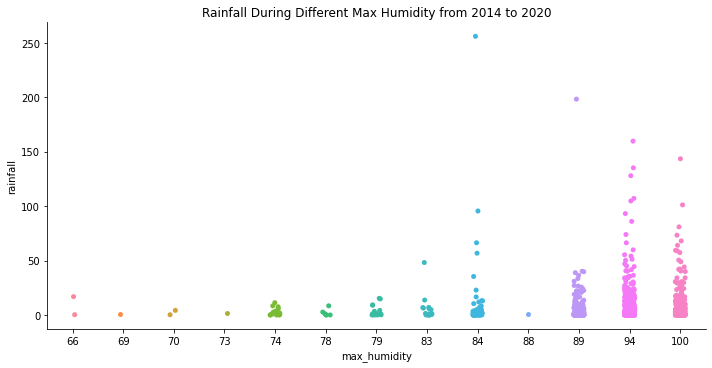

In [36]:
graph = sns.catplot(x="max_humidity", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall During Different Max Humidity from 2014 to 2020')
graph

It is found that the rainfall values are generally higher when the max humidity is 94% or 100%. However, the highest rainfall value plotted is having a max humidity of 84%.

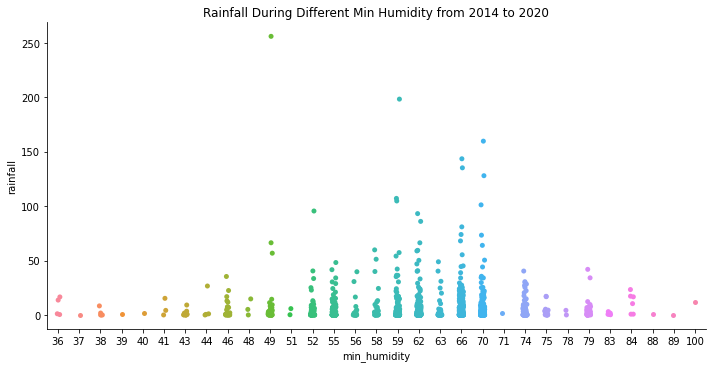

In [37]:
graph = sns.catplot(x="min_humidity", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall During Different Min Humidity from 2014 to 2020')
graph

There are more rainfall values that are higher than 50 when the min humidity is 66% or 70%. However, we observed that several rainfall values that are higher than 150 have min humidity of 49% or 59%.

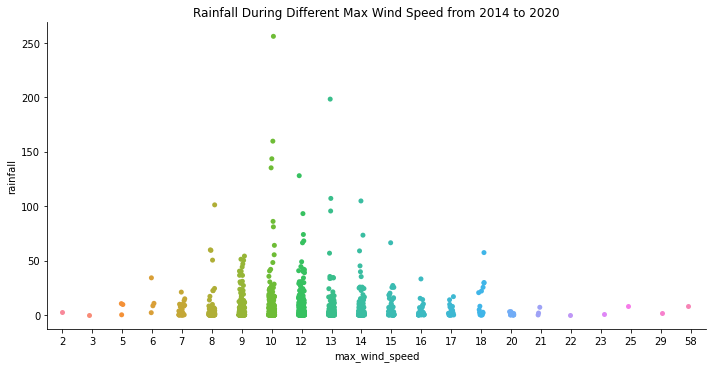

In [38]:
graph = sns.catplot(x="max_wind_speed", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall During Different Max Wind Speed from 2014 to 2020')
graph

When the max wind speed are 10, 12, 13 or 14 mph, there are more rainfall values that are higher than 50. 

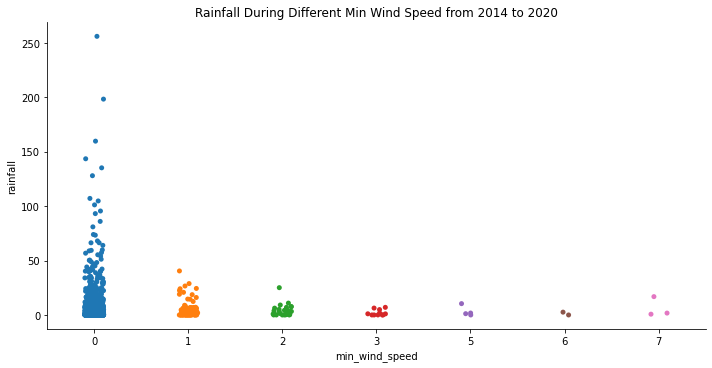

In [39]:
graph = sns.catplot(x="min_wind_speed", y="rainfall", data=df2, height=5, aspect=2)
plt.title('Rainfall During Different Min Wind Speed from 2014 to 2020')
graph

For min wind speed, most of the values are categorized as 0. We may deduct that it is usual to have a min wind speed of 0, where more than half of the data falls in this category. However, the relationship between min wind speed and rainfall is not obvious in this scenario.

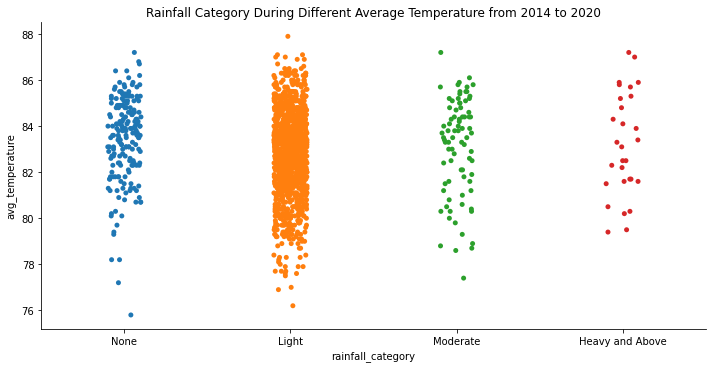

In [40]:
graph = sns.catplot(x="rainfall_category", y="avg_temperature", data=df2, height=5, aspect=2)
plt.title('Rainfall Category During Different Average Temperature from 2014 to 2020')
graph

For average temperature, we observe that in all rainfall category, the average temperature is likely to be between **80 F to 86 F**. 

For the category **None**, there are more data plotted between **around 82.5 F to 86 F**, while for the category **Moderate**, we observe that there are more data plotted between **84 F to 86 F**. The **Light** category has the highest number of data plotted between **82 F to 84 F**.

Through our observation, we may infer that the **None** category generally has a higher average temperature, but rainfall category like **Moderate** also shows a similar range of average temperature.

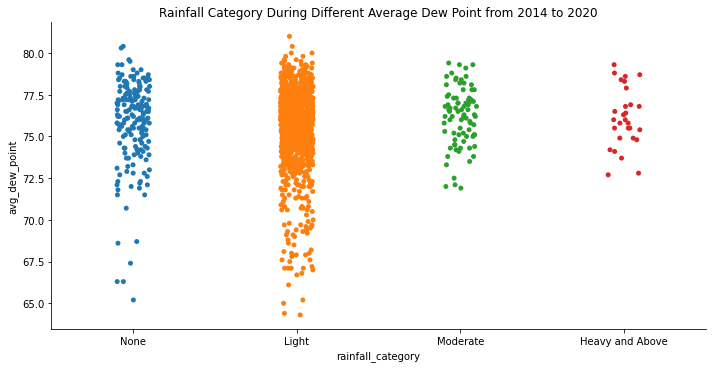

In [41]:
graph = sns.catplot(x="rainfall_category", y="avg_dew_point", data=df2, height=5, aspect=2)
plt.title('Rainfall Category During Different Average Dew Point from 2014 to 2020')
graph

For average dew point, the category **None** has more data plotted between **75 F to 77.5 F**, which is similar to the category **Moderate**. For the category **Light**, the data are plotted between **72.5 F to around 79 F**. For the category **Heavy and Above**, we observe that most of the data are plotted between **around 73 F to 77.5 F**.

It is not clear that the average dew point affect the rainfall intensity of a day, since the data with the category **None** are plotted with a similar range to the other rainfall categories.

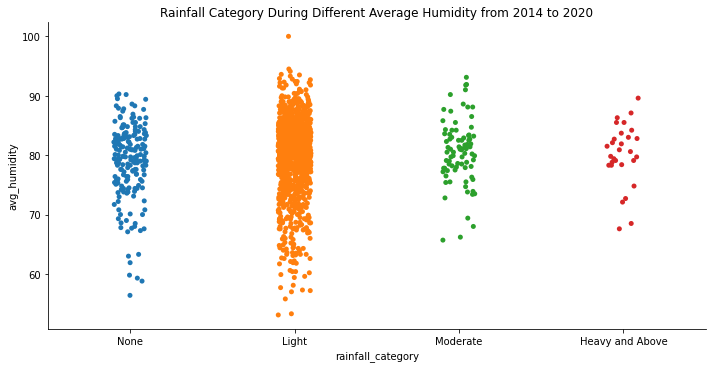

In [42]:
graph = sns.catplot(x="rainfall_category", y="avg_humidity", data=df2, height=5, aspect=2)
plt.title('Rainfall Category During Different Average Humidity from 2014 to 2020')
graph

In terms of average humidity, all the categories have more data plotted between the range 75% to 85%. As the weather in Penang is considered with high humidity, by viewing the average humidity might not significantly show its relationship with rainfall category. 

However, we observe that the average humidity for **Moderate** and **Heavy and Above** are more likely to be **above 80%**, which shows that days with higher humidity has the possibility of having higher rainfall intensity.

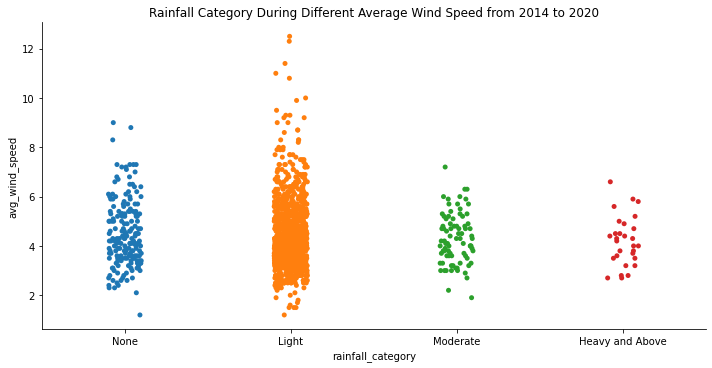

In [44]:
graph = sns.catplot(x="rainfall_category", y="avg_wind_speed", data=df2, height=5, aspect=2)
plt.title('Rainfall Category During Different Average Wind Speed from 2014 to 2020')
graph

For average wind speed, we observe that all categories have more data plotted between **3mph to 6mph**. For the average wind speed of **Light** category, there are high number of data plotted between around **2.5mph to 6mph**.

This implies that average wind speed might not directly affect the rainfall intensity on a day.

**Summary of Categorical Plots**

After viewing the categorical plots of the dataset, we observe that the current dataset is lack of data in high rainfall intensity categories. In Penang, most of the data is showing rainfall values below 20, which are in rainfall categories: None and Light.

In future, more data that has high rainfall values should be included in the dataset to train a more precise model. The limitations that we are facing now is due to the fact that we gather data in a period of time (2014 to 2020), rather than according to the different rainfall intensity (e.g. Light, Moderate, Heavy). We shall take consideration on the rainfall intensity categories in future to collect a more balance dataset that have significant data counts covering all rainfall intensity categories.

####**Heat Map**

A heat map is a colour encoded matrix that ease our visualization on the average rainfall according to day and month. With the use of heat map, we can view which day of the month has a higher average rainfall easily.

Firstly, we use Pandas ```pivot_table``` function to create a pivot table, which is a spreadsheet style table as a dataframe. 

In [45]:
overview = pd.pivot_table(df2, values="rainfall",
                                   index=["day"],
                                   columns=["month"],
                                   fill_value=0,
                                   margins=True)
overview

month,1,2,3,4,5,6,7,8,9,10,11,12,All
day,,,,,,,,,,,,,
1,5.930000,3.296667,11.954000,0.012000,5.268571,3.350000,10.252000,0.547500,1.660000,9.573333,6.670000,0.647500,5.077547
2,1.480000,1.603333,2.725000,0.330000,3.355000,0.010000,6.120000,3.080000,2.810000,41.280000,0.250000,1.000000,5.401923
3,2.995000,5.153333,9.886667,2.930000,2.158000,0.010000,3.185000,5.106667,7.370000,26.674000,1.740000,4.776667,6.593500
4,1.600000,0.753333,20.034000,6.270000,5.620000,0.436667,1.623333,2.767500,14.460000,1.565000,7.242500,7.427500,6.371818
5,1.364000,8.523333,59.886000,8.250000,14.563333,0.300000,1.010000,0.457500,9.020000,15.092000,1.900000,1.392000,10.870755
6,1.173333,14.656667,10.580000,5.095000,8.794000,0.565000,0.436667,1.760000,3.816000,5.213333,4.595000,1.077143,4.686271
7,2.385000,14.920000,0.020000,0.100000,11.572000,4.560000,0.025000,0.942000,6.662000,2.356667,4.053333,5.710000,4.975263
8,2.283333,2.535000,0.123333,0.670000,6.657500,0.372500,1.325000,1.444000,3.514000,0.220000,2.580000,3.510000,2.307442
9,2.570000,2.631667,5.590000,12.730000,7.796667,8.323333,1.074000,0.096667,9.080000,26.310000,0.630000,1.896667,6.610444


Then, we pass the pivot table dataframe to the seaborn ```heatmap``` function, together with other parameters to specify the properties of the heat map.

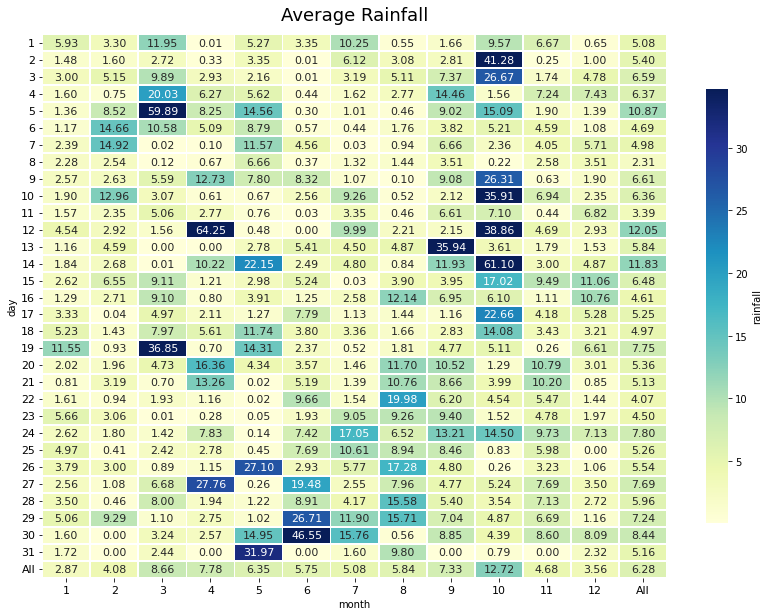

In [46]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(overview, cmap='YlGnBu', robust=True, fmt='.2f', 
                 annot=True, linewidths=.7, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'rainfall'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=11)
plt.title('Average Rainfall', fontdict={'fontsize':18}, pad=14);

From the heat map, we observed that in months of March, May, June, September and October, there are several days that have rainfall values more than 30. October has the most number of days with rainfall values higher than 30. 

This result supports our previous data visualization where rainfall in October shows more spikes in the line graph.

However, we assume that the outliers data did not affect the rainfall average trend (high/low) of a day.

**Summary of Data Visualization**

* The bar charts allow us to visualize the mean and median of the rainfall in month.
* The line charts allow us to visualize the weekly and monthly average rainfall, where spikes in the chart implies that a particular month have more data with high rainfall results.
* The boxplots help us to visualize the median, interquartile range and outliers of different features in each month.
* The categorical plots help us to visualize the relationship between two different variables.
* The heat map allows us to observe the average rainfall values of each day in 12 months.

Overall, we found out that there are several outliers in each features. However, we will remain the outliers as they are in the reasonable range according to the weather behaviour in Malaysia.

There are also several rainfall results that are significantly higher than the average. In future, we will need to include more data records that have high rainfall values to ensure that the model trained has higher accuracy.

Factors such as the balance of data in different rainfall intensity categories (e.g. light, moderate, heavy) should be taken into consideration, besides collecting data in a certain time range (2014 to 2020).

###**Verification of Data Quality**

* Accuracy: The rainfall data obtained from Malaysia Open Data Portal is considered accurate by comparing the dataset with the rainfall trends stated in other websites. The weather data from Weather Underground is considered accurate, where we compare the recent weather with its data recorded.

* Relevancy: The data fulfill the requirements to predict rainfall in Penang.

* Completeness: All weather data that can be retrieved from Weather Underground are mapped with the rainfall result from Malaysia Open Data Portal.

* Timeliness: The data are from 2014 to 2020, which is considered up to date.

* Consistency: The data format are expected, where date column is in datetime format, columns showing average are in float, while columns showing minimum and maximum values are in integer.

##**4. Proposed Solution**

After the data is prepared and being preprocessed, it's time to train our model!

### **Prepare Training and Testing Data**

To deep copy the dataframe into another:

In [47]:
df3 = df.copy()

Since "date" is not an important factor that will affect the outcome, as we had extracted the date into year, month and day columns, we will drop it from our dataset. We will also drop rainfall and rainfall category, as rainfall is used to extract our result (rainfall category).

In [48]:
# Get all factors except the results
X = df3.drop(['date', 'rainfall', 'rainfall_category'], axis=1)
X

,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_humidity,avg_humidity,min_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,year,month,day
0,90,83.7,79,75,72.3,70,79,69.1,55,13,6.5,0,2014,1,1
1,90,81.9,79,79,74.0,72,94,77.8,62,10,6.3,0,2014,1,3
2,88,82.4,77,77,73.0,72,89,74.3,58,10,4.8,0,2014,1,5
3,84,78.3,77,77,75.6,75,100,92.0,79,10,4.0,0,2014,1,10
4,84,79.3,77,77,73.7,72,100,83.9,70,14,6.9,0,2014,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,90,82.9,77,77,73.7,72,84,74.5,59,9,5.2,0,2020,12,24
1412,88,80.2,77,77,75.5,73,94,86.9,70,20,5.6,0,2020,12,26
1413,90,82.0,75,77,73.9,72,94,78.4,55,12,5.4,0,2020,12,27
1414,90,82.4,77,77,75.7,73,100,81.3,62,10,3.4,0,2020,12,28


In [49]:
# Get results
y = df3['rainfall_category']
y

0       Light
1       Light
2       Light
3       Light
4       Light
        ...  
1411     None
1412    Light
1413    Light
1414    Light
1415    Light
Name: rainfall_category, Length: 1416, dtype: category
Categories (4, object): ['None' < 'Light' < 'Moderate' < 'Heavy and Above']

In order to split the dataset into training dataset and testing dataset, the train_test_split method from sklearn module is used.

In [50]:
from sklearn.model_selection import train_test_split

# The size of training dataset is 65% while testing dataset is 35% from the total dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=20)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((920, 15), (496, 15), (920,), (496,))

The training set consists of 920 rows while the testing set consists of 496 rows.

In [52]:
# To confirm all catergory are appeared in the testing dataset
y_test.value_counts()

Light              397
None                60
Moderate            27
Heavy and Above     12
Name: rainfall_category, dtype: int64

### **Testing Different Models**

We will be testing 4 models with our training dataset. Those models are:
*   k-Nearest Neighbors (KNN)
*   Gradient Boosting
*   Decision Tree
*   Random Forest





In [53]:
# Import all methods that can show the accuracy, classification, and confusion matrix for later use
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### **KNN**

In ```KNeighborsClassifier``` function, the parameter ```n_neighbors``` is the tuning parameter (k).

To choose the best k value, we test the model with different values of k (from 1 to 25) using a for loop and record the KNN’s testing accuracy in a variable (scores).

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

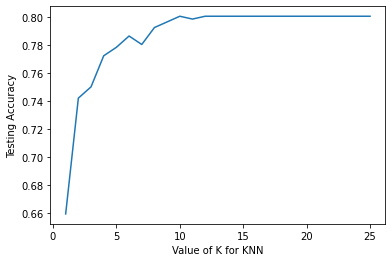

In [55]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

According to the result of testing accuracy, we determine the value of ```n_neighbors``` as 10.

In [56]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [57]:
# The model can calculate the accuracy directly
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.7869565217391304, 0.8004032258064516)

In [58]:
y_pred_1 = knn.predict(X_test)

# Calcuate the accuracy of the testing dataset
knn_acc = accuracy_score(y_test, y_pred_1)
print("Accuracy:", knn_acc)

Accuracy: 0.8004032258064516


In [59]:
# Show report for classification
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

Classification Report:
                 precision    recall  f1-score   support

Heavy and Above       0.00      0.00      0.00        12
          Light       0.80      1.00      0.89       397
       Moderate       0.00      0.00      0.00        27
           None       0.50      0.02      0.03        60

       accuracy                           0.80       496
      macro avg       0.33      0.25      0.23       496
   weighted avg       0.70      0.80      0.72       496



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Show confusion matrix
cf_matrix1=confusion_matrix(y_test, y_pred_1)
print("Confusion matrix:")
print(cf_matrix1)

Confusion matrix:
[[  0  12   0   0]
 [  0 396   0   1]
 [  0  27   0   0]
 [  0  59   0   1]]


The confusion matrix is the summary of the prediction results. Y axis is the actual label from testing dataset while X axis is the predicted label from the trained model. The format is shown as below:

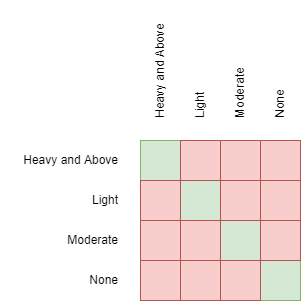

Any number inside the green boxes are the correct prediction, while inside the red boxes are incorrect prediction.

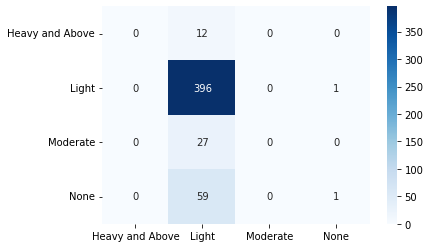

In [61]:
x_axis_labels = ['Heavy and Above', 'Light', 'Moderate', 'None'] # labels for x-axis
y_axis_labels = ['Heavy and Above', 'Light', 'Moderate', 'None'] # labels for y-axis
sns.heatmap(cf_matrix1, cmap='Blues', annot=True, fmt=".3g", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Most of the predictions are accurate for the category **Light** rainfall, but it is unable to correctly predict the testing data in **Moderate** and **Heavy and Above** categories. Only 1 test data in **None** category is correctly predicted.

#### **Gradient Boosting**

For Gradient Boosting model, we will fine tune the value of the parameter ```learning_rate``` by running a list of learning rate to find the one with the highest training accuracy score.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.25]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=3, max_depth=6, random_state=0)
    gb_clf.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))

Learning rate:  0.05
Accuracy score (training): 0.996
Learning rate:  0.075
Accuracy score (training): 1.000
Learning rate:  0.1
Accuracy score (training): 1.000
Learning rate:  0.25
Accuracy score (training): 1.000
Learning rate:  0.5
Accuracy score (training): 1.000
Learning rate:  0.75
Accuracy score (training): 1.000
Learning rate:  1
Accuracy score (training): 1.000
Learning rate:  1.25
Accuracy score (training): 1.000


According to the result above, we will use the value of **0.075** as the learning rate of the model.

In [63]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.075, max_features=3, max_depth=6, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.075, max_depth=6, max_features=3,
                           random_state=0)

In [64]:
y_pred_2 = gb.predict(X_test)

gb_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy:", gb_acc)

Accuracy: 0.8064516129032258


In [65]:
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

Classification Report:
                 precision    recall  f1-score   support

Heavy and Above       1.00      0.08      0.15        12
          Light       0.81      0.98      0.89       397
       Moderate       0.00      0.00      0.00        27
           None       0.57      0.13      0.22        60

       accuracy                           0.81       496
      macro avg       0.60      0.30      0.32       496
   weighted avg       0.74      0.81      0.74       496



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
cf_matrix2=confusion_matrix(y_test, y_pred_2)
print("Confusion matrix:")
print(cf_matrix2)

Confusion matrix:
[[  1  11   0   0]
 [  0 391   0   6]
 [  0  27   0   0]
 [  0  52   0   8]]


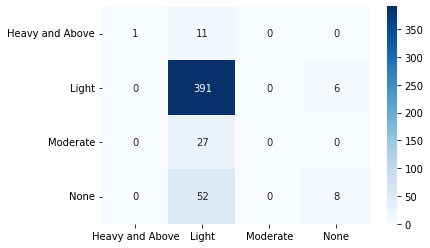

In [67]:
x_axis_labels = ['Heavy and Above', 'Light', 'Moderate', 'None'] # labels for x-axis
y_axis_labels = ['Heavy and Above', 'Light', 'Moderate', 'None'] # labels for y-axis
sns.heatmap(cf_matrix2, cmap='Blues', annot=True, fmt=".3g", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Most of the prediction are accurate for the category **Light** rainfall, but it is unable to correctly predict the test data in **Moderate** category. 8 of the test data can be correctly predicted in **None** category, while 1 of the test data can be correctly predicted as **Heavy and Above** category.

#### **Decision Tree**

For Decision Tree model, we have noticed that by fine tuning the ```max_depth``` parameter will result in a model with a higher accuracy. If we do not include a suitable value for the ```max_depth``` parameter, our model is likely to be overfitting.

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=9)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [69]:
y_pred_3 = dtc.predict(X_test)

dtc_acc = accuracy_score(y_test, y_pred_3)
print("Accuracy:", dtc_acc)

Accuracy: 0.7600806451612904


In [70]:
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

Classification Report:
                 precision    recall  f1-score   support

Heavy and Above       0.00      0.00      0.00        12
          Light       0.81      0.93      0.87       397
       Moderate       0.08      0.04      0.05        27
           None       0.26      0.08      0.13        60

       accuracy                           0.76       496
      macro avg       0.29      0.26      0.26       496
   weighted avg       0.68      0.76      0.71       496



In [71]:
cf_matrix3=confusion_matrix(y_test, y_pred_3)
print("Confusion matrix:")
print(cf_matrix3)

Confusion matrix:
[[  0  12   0   0]
 [  5 371  10  11]
 [  0  23   1   3]
 [  1  53   1   5]]


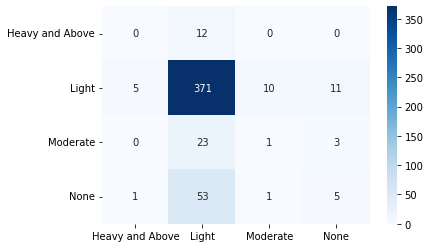

In [72]:
x_axis_labels = ['Heavy and Above', 'Light', 'Moderate', 'None'] # labels for x-axis
y_axis_labels = ['Heavy and Above', 'Light', 'Moderate', 'None'] # labels for y-axis
sns.heatmap(cf_matrix3, cmap='Blues', annot=True, fmt=".3g", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Most of the prediction are accurate for the category **Light** rainfall. There are a few correct predictions for the test data in **None** and **Moderate** categories. It is found that it cannot consistently predict the test data in **Heavy and Above** category.

#### **Random Forest**

A random forest is a collection of decision trees. As more trees will give a more robust model and prevents overfitting, articles generally claims that random forest is more accurate than decision tree. So, let's find out.

[Ref: https://www.aitude.com/decision-tree-vs-random-forest-in-machine-learning/]

In [73]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier()
ran.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
y_pred_4 = ran.predict(X_test)
ran_acc = accuracy_score(y_test, y_pred_4)
print("Accuracy:", ran_acc)

Accuracy: 0.7983870967741935


In [75]:
print("Classification Report:")
print(classification_report(y_test, y_pred_4))

Classification Report:
                 precision    recall  f1-score   support

Heavy and Above       0.00      0.00      0.00        12
          Light       0.80      0.99      0.89       397
       Moderate       0.00      0.00      0.00        27
           None       0.40      0.03      0.06        60

       accuracy                           0.80       496
      macro avg       0.30      0.26      0.24       496
   weighted avg       0.69      0.80      0.72       496



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
cf_matrix4=confusion_matrix(y_test, y_pred_4)
print("Confusion matrix:")
print(cf_matrix4)

Confusion matrix:
[[  0  12   0   0]
 [  0 394   0   3]
 [  0  27   0   0]
 [  0  58   0   2]]


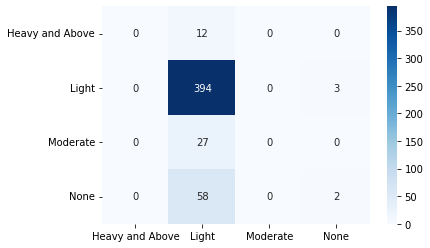

In [77]:
x_axis_labels = ['Heavy and Above', 'Light', 'Moderate', 'None'] # labels for x-axis
y_axis_labels = ['Heavy and Above', 'Light', 'Moderate', 'None'] # labels for y-axis
sns.heatmap(cf_matrix4, cmap='Blues', annot=True, fmt=".3g", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Most of the prediction are accurate for the category **Light** rainfall. However, it cannot predict correctly the test data in **Moderate** and **Heavy and Above** categories. Although the model is slightly more accurate than decision tree, the test data in two of the categories cannot be predicted.

### **Choosing the Best Model**

To compare the accuracy of different models:

In [78]:
models = pd.DataFrame({
    'Model': ['KNN', 'Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'Accuracy': [round(knn_acc, 4), round(gb_acc, 4), round(dtc_acc, 4), round(ran_acc, 4)]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Gradient Boosting,0.8065
0,KNN,0.8004
3,Random Forest,0.7984
2,Decision Tree,0.7601


From the table above, we can conclude that the best model is the Gradient Boosting Classifier as it obtained a 80.65% accuracy as the prediction for the rainfall category, followed by KNN with 80.04% accuracy, Random Forest 79.84% and Decision Tree 76.01%.


### **Discussion**

#### **Comparison between Models**

For this project, the models we used to predict the test dataset are KNN, Gradient Boosting, Decision Tree and Random Forest.

**KNN** or **k-Nearest Neighbors** algorithm is the simplest and easy-to-implement supervised learning algorithm. It assumes that similar things exist in close proximity, which means similar things are near each other. We need to choose a suitable value of k so that the accuracy of the prediction will be increased (up to certain point).

**Gradient Boosting** algorithm is one of the powerful techniques that converts weak learners into strong learners. It can be used to solve classification and regression problems. It is also one of the popular supervised machine learning technique.

**Decision Tree** is a supervised machine learning algorithm that can be used for both classification and also regression. It is a flowchart-like structure that consists of internal nodes, leaf node, and branches. 

**Random Forest** is a supervised machine learning algorithm that can be used in classification and regression problems. It builds decision trees on different samples and takes their majority vote for classification and average for regression.

**Comparisons**

Both Random Forest and Gradient Boosting is a set of decision trees. While Random Forest builds each tree independently, Gradient Boosting builds one tree at a time. Therefore, Gradient Boosting can result in better performance than Random Forest as it introduce a weak learner to improve the shortcomings of existing weak learners. 

[Ref: https://www.datasciencecentral.com/decision-tree-vs-random-forest-vs-boosted-trees-explained/]

-----
As for KNN, it works better with small number of input variables and it is very sensitive to outliers. Therefore, its accuracy is slightly lower than Gradient Boosting model.
[Ref: https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/]



##### **Overall Findings**

We found out that most of the decision models are not able to predict accurately the test data for **Moderate** and **High and Above** categories. This may be due to the data in these 2 categories are not enough to train the model, where they are less than the data in **None** and **Light** categories.

Most of the data will tends to be wrongly predicted as **Light** rainfall category, due to there are way more data falling under **Light** category. 

Besides, there is possibility that the current features used are not enough for the model to be trained for clear identification of the rainfall categories. Another possibility is the relationship between the current features with the result (rainfall category) are not strong enough, where more suitable features that can help to identify the rainfall category should be included to train the model.

The dataset is unbalance as well, as we have the limitation to gather more rainfall data that has high rainfall intensity from open sources. We gathered the data in a certain time frame (2014 to 2020) rather than ensuring the dataset is balance for different rainfall intensity categories. Therefore, we should ensure a more balance dataset in future to train a model with higher accuracy.

##### **Fine Tuning Approaches**

* To improve the accuracy of the model, we had fine tune some of the parameters in the machine learning algorithms.

* We have tried to fine tune the model by removing more than 100 of the outliers, but the accuracy difference are insignificant, so we remain the dataset without any changes.

* Combining the rainfall intensity categories Heavy, Very Heavy and Extreme to a single category **Heavy and Above** provides a better dataset for the training model.

#### **Limitations**

Due to the limited number of data for the rainfall category **Medium** and **Heavy and Above**, the models might not be able to classify those categories accurately. The imbalance number of data for different rainfall category in the dataset might affect the accuracy of the model trained. 

The limitations is caused by the lack of history rainfall and weather data in Penang that is available in open sources. Most of the sources for history rainfall and weather data require payments or subscriptions. In future, we should try to gather a wider dataset, especially for the data that falls in **Medium** and **Heavy and Above** categories.

#### **Future Improvements**

To improve the machine learning model, we need to gather more data that falls into **Medium** and **Heavy and Above** rainfall categories. We should ensure that the dataset is balance, so that we can train the model to predict the different rainfall intensity more accurately.

To gather high number of reliable data to train the model, we can seek for research collaboration with Malaysian Meteorological Department to obtain weather data from satellites, radars, observation stations, and international meteorological departments. This can help us to explore and implement features that have strong relationship with the result (rainfall category).

### **Model Deployment**

**Mode of Serving Clients**

For deployment of the model, we will deploy the model in a web application, where the users can easily view and run prediction of rainfall in Penang. The front end is proposed to be written in HTML, CSS and JavaScript while the backend is written in Python Flask. As the web application is also planned to be mobile-friendly, users can use the web application in any latest browsers from their laptops and mobile devices. For future mode of serving, a mobile application may be introduced as it is more convenient for the user to receive real time notifications on heavy rainfall predictions.

**Data Storage**

The data will be stored in MongoDB database. It is a NoSQL database that allows us to store huge amount of unstructured data with ease, which allows more scalability and flexibility. It offers faster processing speed as well, which is suitable for us to handle large amount of data in future.

**Update the Model**

When new data is available, we will upload it to the database. Then, we can export the fields we want for model training from MongoDB in .csv format. We can upload the file containing new data to the script to retrain the model. Data analysis and preprocessing should be done with the new data before training the model. Another possible approach is to write a script in Python that helps us to automate these processes.

**Monitor the Model**

To monitor whether the model is performing as intended, we will constantly feed the model with the latest weather data to check whether the rainfall prediction is accurate. Besides, we will store the resutls run by the users in our web application to analyze the results that are inaccurate. 

If the model is failing, we will analyze the data input that result in inaccurate predictions. We will analyse the issue and react accordingly.
If the inaccurate prediction is due to uncommon data are provided, we will include the dataset with rare data. If the failure of the model is due to bad data is provided, we will make sure to include data validation to the users in the web application. Lastly, if the model is failing due to the inaccuracy of the model, we will enhance the model by fine tuning the dataset and machine learning algorithms.

##**5. Conclusion**

####**Impacts**
In conclusion, the rainfall prediction model can help the citizens in Penang to took precautions of flash floods when the rainfall intensity predicted is high.  This helps to ensure people's safety, as well as decrease the losses of properties like machines, cars and furniture. 

Besides, the rainfall prediction model can be used in daily basis to predict whether it is a rainy day. This helps us to plan ahead of time when we need to avoid events from organizing in bad weather. We can easily predict the needs of an umbrella or a rain coat as well with the use of this rainfall prediction model.

####**Summary**
Disasters caused by heavy rainfall is a rising issue in modern days that should not be neglected. Data analytics and machine learning can be used to determine the hidden trend or information from the datasets which helps in further predictions. In this project, a few classification methods are studied and their accuracy are compared, in which Gradient Boosting gives the highest accuracy (0.806), followed by k-Nearest Neighbour (0.800), Random Forest (0.798) and Decision Tree (0.760). It can be concluded that **Gradient Boosting** is the best model for this classification task. Future research should be done to improve the dataset.